# Linear Regression Model

# 0. Load data

## 0.1 Phần tải data:

+ Phần này dùng để tải dữ liệu từ máy local lên

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# target to show plot in jupyter notebook and not external window
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data = pd.read_csv("data_predict_price_hourse.csv")
# Display the first few rows of the dataframe
df_data.head()

,quan,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
0,Gò Vấp,147.0,479.0,17.0,18.0,16.8
1,Tân Phú,180.0,179.0,13.0,13.0,23.0
2,10,53.0,53.0,2.0,2.0,4.3
3,9,233.0,233.0,28.0,28.0,26.0
4,10,102.0,102.0,2.0,2.0,3.7


## 0.2 Phần thông tin thêm:

+ Mục tiêu phần nay thêm một vài góc nhìn như: kích thước data, feature nào là chữ, nào là số,...
+ Có thể không cần quan tâm ở dưới cũng có chi tiết hơn

In [3]:
# Print the shape of the dataframe
print(df_data.shape)

(4262, 6)


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4262 entries, 0 to 4261
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quan                  4262 non-null   object 
 1   dien_tich_dat_m2      4262 non-null   float64
 2   dien_tich_su_dung_m2  4262 non-null   float64
 3   phong_ngu             4262 non-null   float64
 4   nha_tam               4262 non-null   float64
 5   gia                   4262 non-null   float64
dtypes: float64(5), object(1)
memory usage: 199.9+ KB


In [5]:
# Get the names of numberic columns
df_data.select_dtypes(exclude=['object']).shape

(4262, 5)

In [6]:
# Đây là các thuộc tính ở dạng số
df_data.select_dtypes(exclude=['object']).columns

Index(['dien_tich_dat_m2', 'dien_tich_su_dung_m2', 'phong_ngu', 'nha_tam',
       'gia'],
      dtype='object')

In [7]:
# Get the names of object (non-numerical) columns
df_data.select_dtypes(include=['object']).shape

(4262, 1)

In [8]:
# Đây là các thuộc tính ở dạng chữ
df_data.select_dtypes(include=['object']).columns

Index(['quan'], dtype='object')

In [9]:
# Ở attribute quận có các loại và số dữ liệu loại đó
print(df_data['quan'].unique())
df_data['quan'].value_counts()

['Gò Vấp' 'Tân Phú' '10' '9' 'Bình Tân' '5' '7' 'Phú Nhuận' '3'
 'Bình Thạnh' '1' '2' '4' '6' '8' '11' '12' 'Tân Bình'
 'Thủ Đức (TP. Thủ Đức)']


quan
9                        358
6                        334
4                        300
8                        278
12                       266
1                        264
11                       261
Tân Phú                  251
5                        230
2                        221
7                        209
10                       190
Tân Bình                 186
Bình Tân                 184
Phú Nhuận                180
Thủ Đức (TP. Thủ Đức)    157
Bình Thạnh               137
Gò Vấp                   128
3                        128
Name: count, dtype: int64

In [10]:
# Get summary statistics of numerical columns
df_data.describe()

,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
count,4262.000000,4.262000e+03,4262.000000,4262.000000,4262.000000
mean,126.469885,5.546883e+02,4.625059,4.571093,24.725732
std,296.340570,1.838562e+04,5.011342,5.297176,54.241870
min,1.000000,1.000000e+00,1.000000,1.000000,0.001000
25%,58.000000,8.212500e+01,3.000000,2.000000,5.100000
50%,77.000000,1.400000e+02,4.000000,3.000000,9.700000
75%,120.000000,2.935000e+02,5.000000,5.000000,22.000000
max,10000.000000,1.200000e+06,100.000000,100.000000,1000.000000


# 1. EDA (Phân tích Khám phá Dữ liệu)

+ Mục tiêu phần này là xem dữ liệu đang có gì và ra sau, xem xét tính outlier của dữ liệu, sự tương quan của các feature với "gia" = heatmap, ...

## 1.1 Thông tin cơ bản về data:

+ Mục tiêu: xem dữ liệu có gì, các giá trị trung vị (áp dụng cho các feature là số),...

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4262 entries, 0 to 4261
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quan                  4262 non-null   object 
 1   dien_tich_dat_m2      4262 non-null   float64
 2   dien_tich_su_dung_m2  4262 non-null   float64
 3   phong_ngu             4262 non-null   float64
 4   nha_tam               4262 non-null   float64
 5   gia                   4262 non-null   float64
dtypes: float64(5), object(1)
memory usage: 199.9+ KB


In [12]:
df_data.describe()

,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
count,4262.000000,4.262000e+03,4262.000000,4262.000000,4262.000000
mean,126.469885,5.546883e+02,4.625059,4.571093,24.725732
std,296.340570,1.838562e+04,5.011342,5.297176,54.241870
min,1.000000,1.000000e+00,1.000000,1.000000,0.001000
25%,58.000000,8.212500e+01,3.000000,2.000000,5.100000
50%,77.000000,1.400000e+02,4.000000,3.000000,9.700000
75%,120.000000,2.935000e+02,5.000000,5.000000,22.000000
max,10000.000000,1.200000e+06,100.000000,100.000000,1000.000000


## 1.2 Plot data

+ Mục tiêu: trực quan hoá phân bổ dữ liệu hơn, giúp người đọc có một cái nhìn tổng quan hơn từ đó mà có thể xem xét có nên lọc các dữ liệu vô nghĩa hay không.
+ Visualization: ở đây để xem ở các góc độ khác nhau data sẽ có phân bổ như nào.

### Plot Full data

+ Mục tiêu: lấy toàn bộ data đem visualize lên để xem dữ liệu đang có gì

Text(0.5, 1.0, 'Distribution of House Prices')

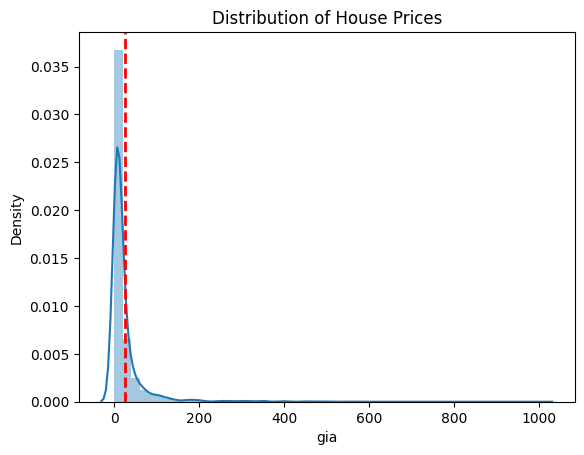

In [13]:
# target variable
sns.distplot(df_data['gia'])
plt.axvline(x=df_data['gia'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Distribution of House Prices')

+ Nhận xét: Nhìn biểu đồ có vẻ khá lệch về bên trái do có một vài giá trị outlier

### Plot with capped data

+ Mục tiêu: visualization dữ liệu lên nhưng dữ liệu ở đây được lấy như sau:
    + Các dữ liệu nằm dưới 0.99% dữ liệu max thì để nguyên
    + Các dữ liệu trên 0.99% dữ liệu max thì cho về giá trị 0.99% giá trị max.
+ Từ đó: xem xét được phần dưới có phân bố ổn hơn không (0.99 ở đây là lấy cho thử nghiệm).

Text(0.5, 1.0, 'Distribution of House Prices')

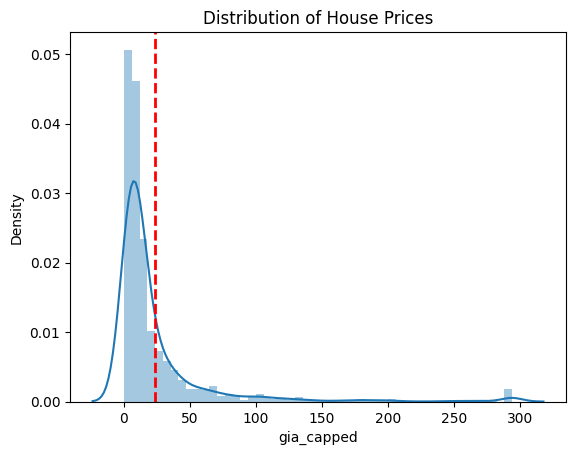

In [14]:
# target variable
df1 = df_data.copy()
upper = df1['gia'].quantile(0.99)
df1['gia_capped'] = df1['gia'].clip(upper=upper)
sns.distplot(df1['gia_capped'])
plt.axvline(x=df1['gia_capped'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Distribution of House Prices')

### Plot with log(gia) - gia transform

+ Thông thường các giá trị chênh lệch lớn quá, nhỏ quá ta sẽ sử dụng log để mà các giá trị chênh nhau nhưng ổn định hơn (có thể tham khảo thêm).
+ Mục tiêu: xem khi log(gia) thì dữ liệu có phân bố như nào.

Text(0.5, 1.0, 'Distribution of House Prices')

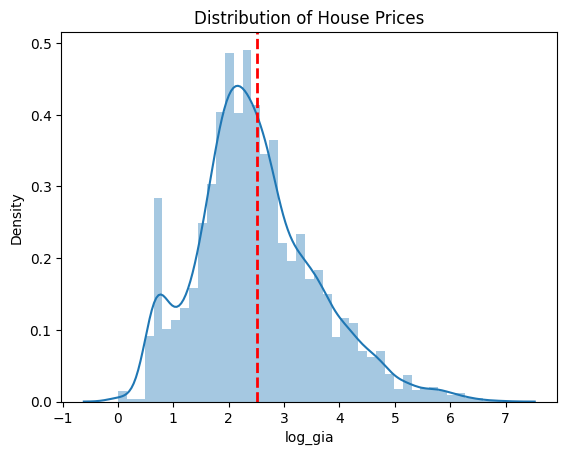

In [15]:
# target variable
df2 = df_data.copy()
df2['log_gia'] = np.log1p(df2['gia'])
sns.distplot(df2['log_gia'])
plt.axvline(x=df2['log_gia'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Distribution of House Prices')

## 1.3 Visualize number value missed in data

+ Mục tiêu kiểm tra các feature trong data có bị missing không. Từ đó có các kĩ thuật lấp các chỗ missing cho phù hợp.
+ Data hiện tại không có sự missing

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing(df: pd.DataFrame,  min_count: int = 1, figsize=(10, 6)) -> None:
    """
    Vẽ biểu đồ số lượng giá trị thiếu theo cột.
    - min_count: chỉ vẽ những cột có số thiếu >= min_count
    """
    # Đếm thiếu
    missing = df.isna().sum()

    # Lọc theo ngưỡng (mặc định: bỏ các cột không thiếu)
    missing = missing[missing >= min_count]

    # Nếu rỗng thì thông báo và thoát (tránh IndexError)
    if missing.empty:
        print("No missing values.")
        return

    # Sắp xếp tăng dần để khi đảo trục Y, cột thiếu nhất nằm trên cùng
    missing = missing.sort_values(ascending=True)

    # Tính % thiếu
    pct = (missing / len(df) * 100).round(2)

    # Vẽ
    fig, ax = plt.subplots(figsize=figsize)
    missing.plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

    ax.set_title("Missing Data by Feature", fontsize=14)
    ax.set_xlabel("Number of Missing Values")
    ax.set_ylabel("Feature Name")
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Đưa feature thiếu nhiều lên trên
    ax.invert_yaxis()

    # Ghi nhãn số lượng + %
    for i, (v, p) in enumerate(zip(missing.values, pct.values)):
        ax.text(v, i, f"  {int(v)} ({p}%)", va='center')

    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_missing(df_data)


No missing values.


## 1.4 Visualization Heatmap of Data without feature "quan"

+ Feature "quan": sẽ được pre-processing ở các bước sau
+ Mục tiêu: Xem xét trực quan sự tương đồng của các feature cũng như là có với label "gia" có tác động hay sau không. Từ đó mà xem xét có nên bỏ hay lấy feature đó không.
    + Các feature nếu có tác động qua lại nghĩa là có sự trùng lặp giữa 2 feature có thể lược (theo lý thuyết).
    + Nhưng trong thực tế thì không như vậy, đôi lúc có sự tương quan nhưng vẫn có tác động nào đó đến label cuối.
    + Vì thế Heatmap không quyết định được lấy hay bỏ - mà việc lấy hay bỏ dựa vào expert trong lĩnh vực đó.
=> Heatmap: một phần nào đó giúp chúng ta có góc nhìn hơn về các feature có tác động như nào với label góc. Nhưng quyết định bỏ hay lấy feature còn dự vào expert trong lĩnh vực đó.

### 1.4.1 Heatmap full data

+ Mục tiêu: xem nếu full data thì như nào

+ Nhận xét:
    + Có vẻ sự tương quan giữa feature "gia" và các feature khác trung bình, yếu.

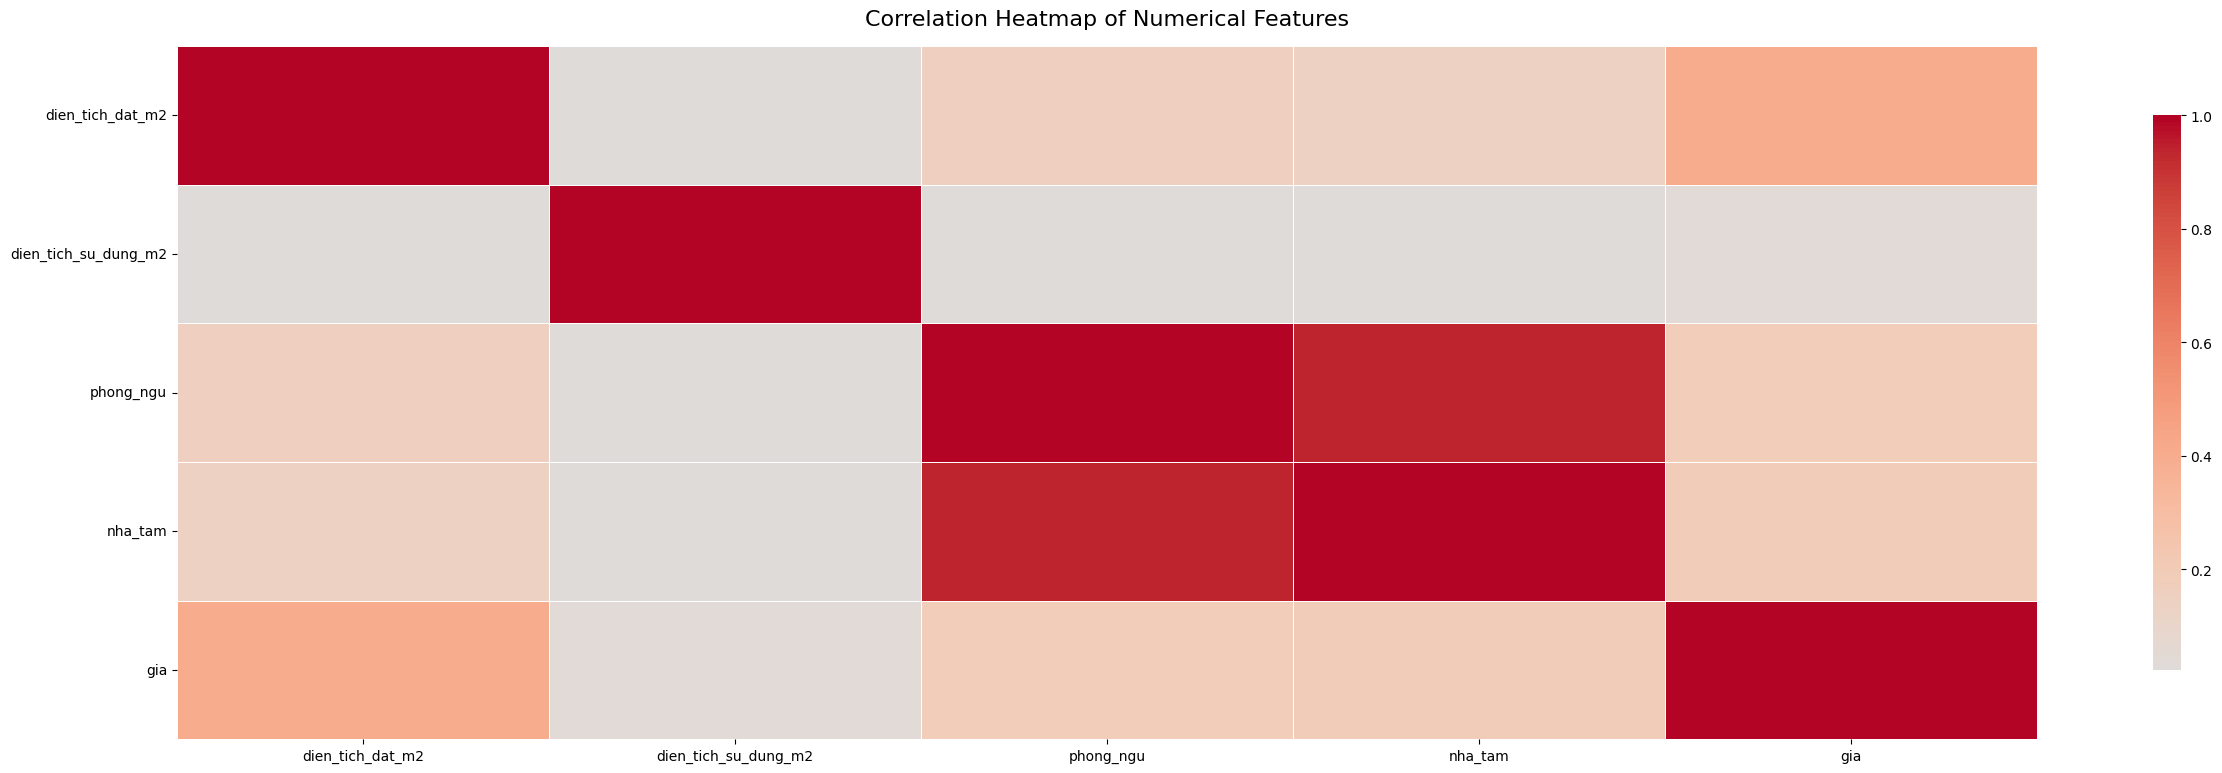

In [17]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    df_data.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


### 1.4.2 Heatmap with data gia < 100

+ Một góc nhìn khác khi "gia" < 100

+Nhận xét: có sự tương quan rõ rệt hơn

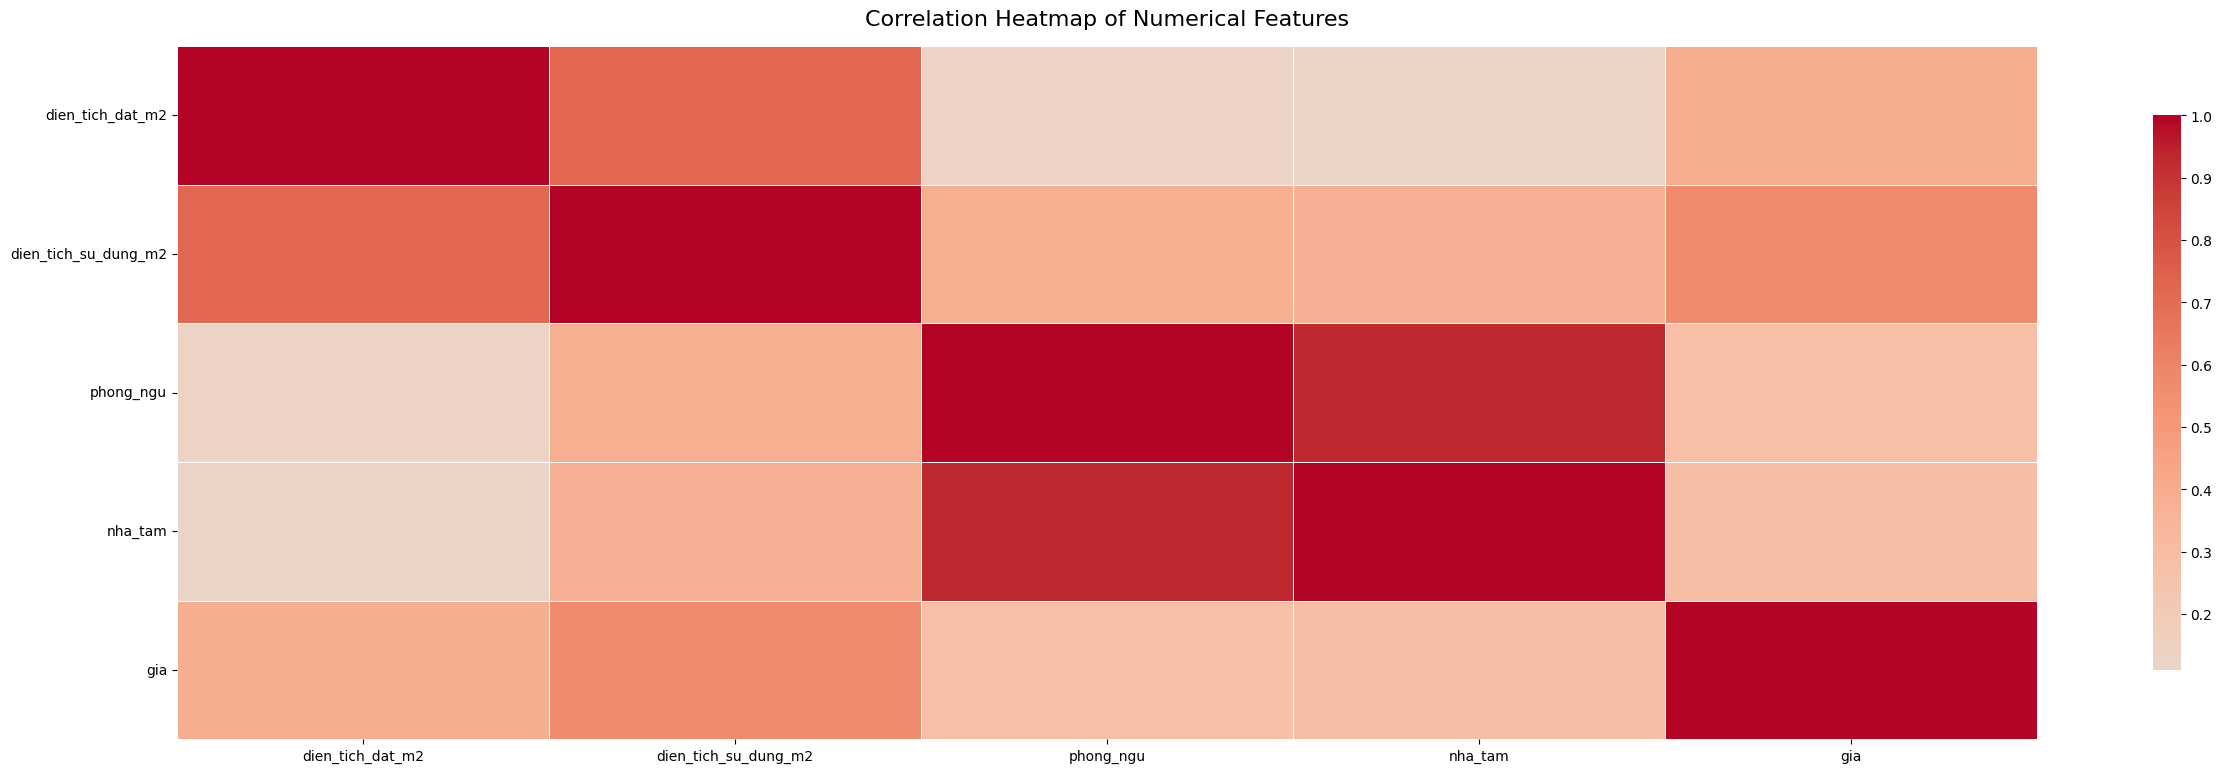

In [18]:
# Visualization Heatmap of gia < 100
plt.figure(figsize=(30, 9))
sns.heatmap(
    df_data[df_data['gia'] < 100].corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()

### 1.4.3 Heatmap when data is log(price)

In [19]:
df = df_data.copy()
df['gia_log'] = np.log1p(df['gia'])
corr_s = df[['dien_tich_dat_m2','dien_tich_su_dung_m2','phong_ngu','nha_tam','gia_log']].corr(method='spearman')

corr_s


,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia_log
dien_tich_dat_m2,1.000000,0.649707,0.313769,0.276641,0.679771
dien_tich_su_dung_m2,0.649707,1.000000,0.539991,0.524695,0.699877
phong_ngu,0.313769,0.539991,1.000000,0.894854,0.479767
nha_tam,0.276641,0.524695,0.894854,1.000000,0.481132
gia_log,0.679771,0.699877,0.479767,0.481132,1.000000


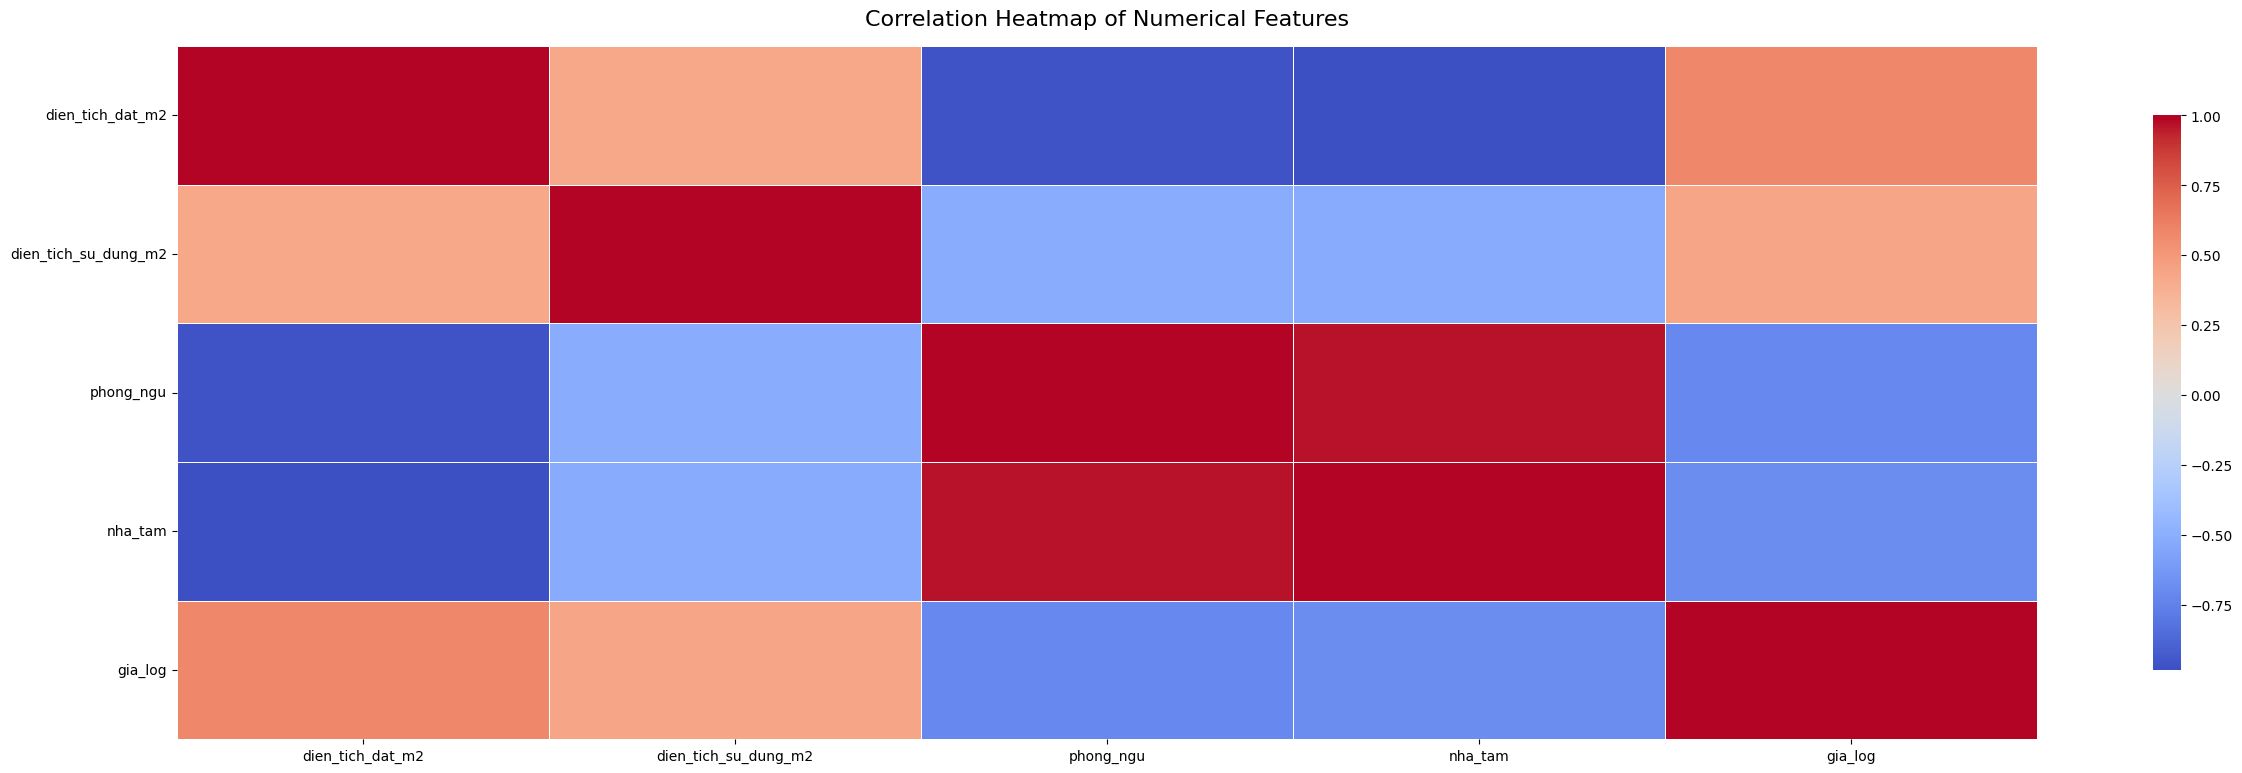

In [20]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    corr_s.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


## 1.5 Data Plot

+ Mục tiêu:
    + Tóm tắt phân bố dữ liệu
    + Phát hiện outlier
    + So sánh nhiều nhóm dữ liệu
    + Nhìn nhanh độ lệch & độ phân tán

### 1.5.1 BotPlot full data:

+ Nhận xét: Khá nhiều outlier

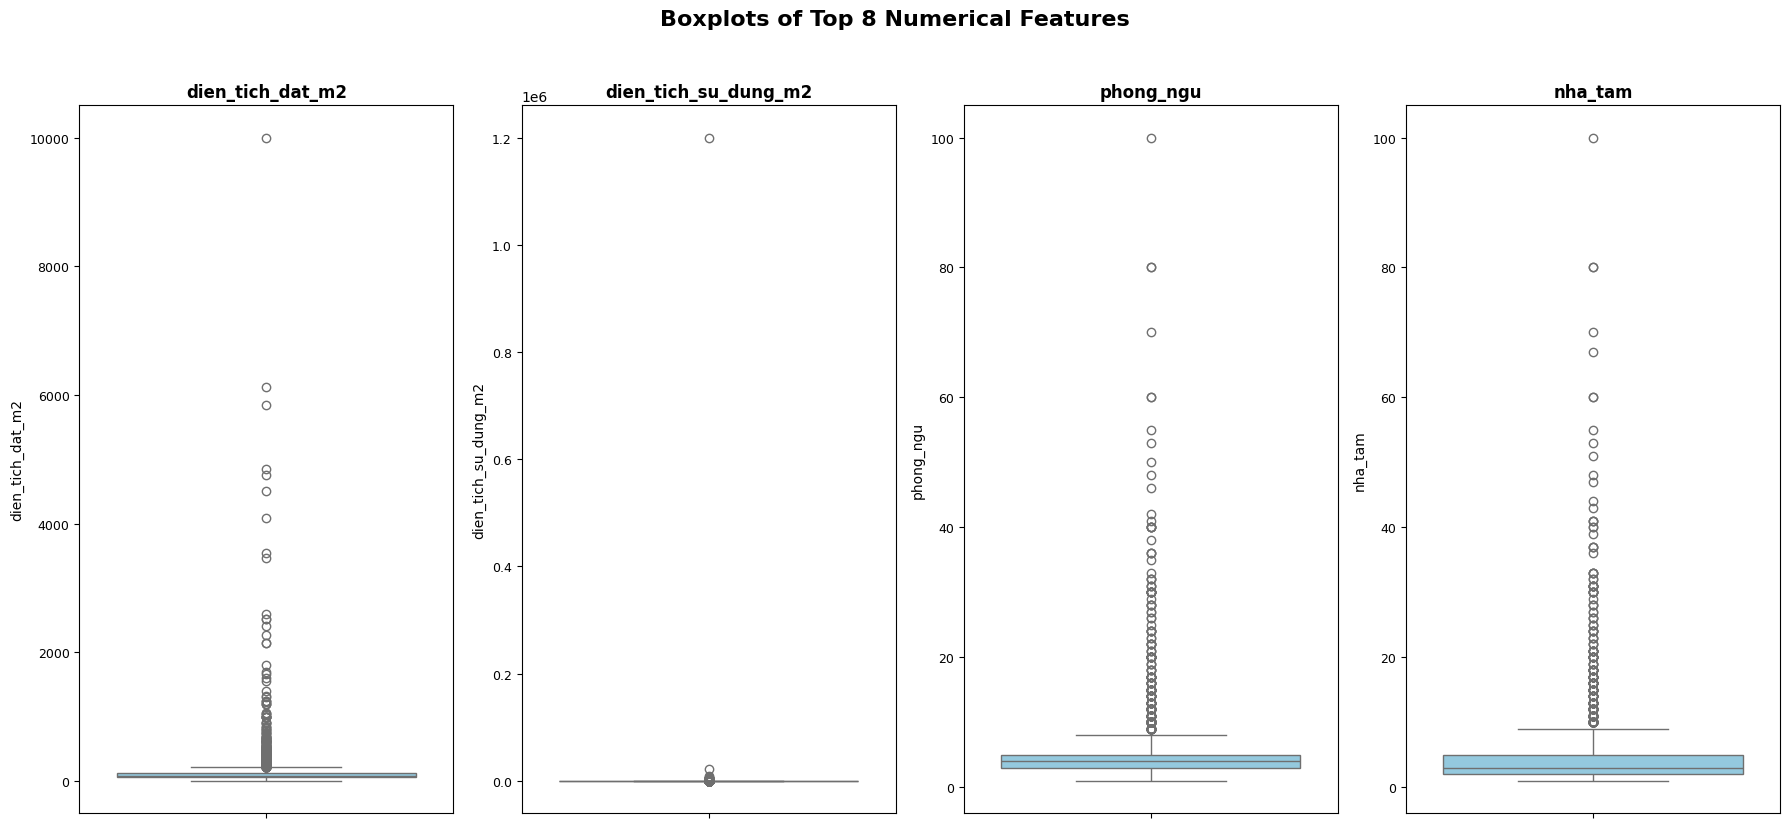

In [21]:
# Chọn 8 đặc trưng numeric quan trọng nhất dựa trên tương quan với SalePrice
important_cols = [
    'dien_tich_dat_m2',
    'dien_tich_su_dung_m2',
    'phong_ngu',
    'nha_tam',
]

fig, axes = plt.subplots(1, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=df_data, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 8 Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

### 1.5.2 Data plot với một vài giới hạn

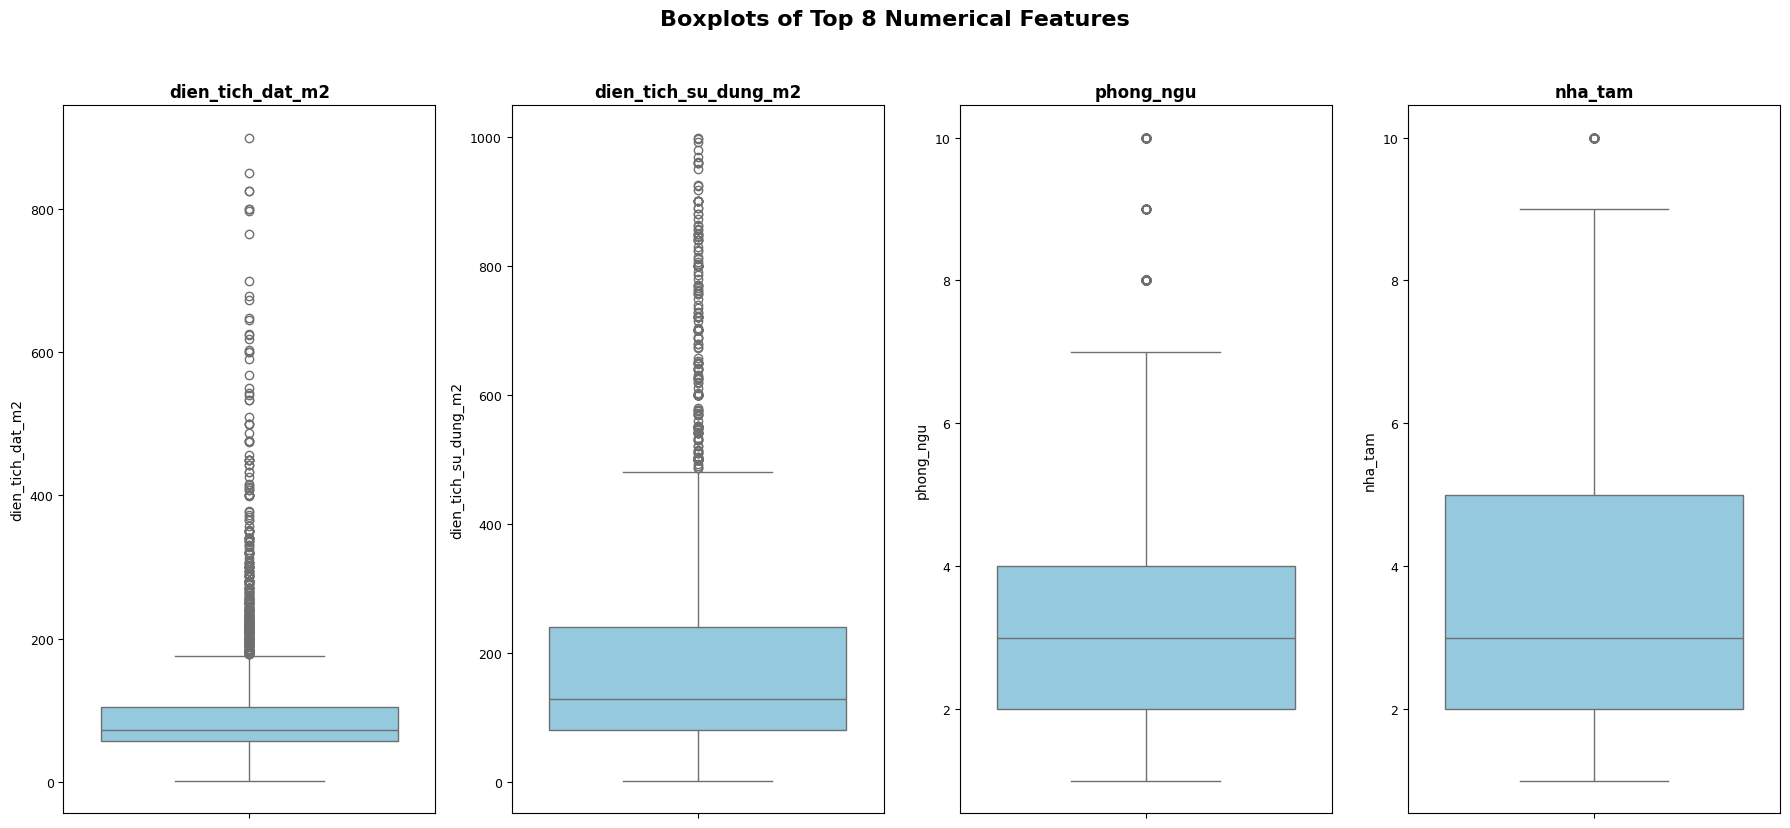

In [22]:
df_viz = df[
    (df['dien_tich_su_dung_m2'] < 1000) &
    (df['dien_tich_dat_m2'] < 1000) &
    (df['phong_ngu'] <= 10) &
    (df['nha_tam'] <= 10)
]
fig, axes = plt.subplots(1, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=df_viz, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 8 Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

## 1.6 A other view when data cleaned (optional)

+ Mục tiêu: xem xét khi dọn dữ liệu thì mô hình có phân bổ như nào
+ Nhìn chung phân bố ổn định hơn.
+ Đây chỉ là góc nhìn thêm nếu muốn dọn bớt 1 phần outlier có thể thử nghiệm.

In [23]:
df_clean = df_data[
    (df_data['dien_tich_dat_m2'] <= 1000) &
    (df_data['dien_tich_su_dung_m2'] <= 2000) &
    (df_data['phong_ngu'] <= 10) &
    (df_data['nha_tam'] <= 10)
]
print(df_clean.shape)

(3981, 6)


In [24]:
df_clean.head()


,quan,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
2,10,53.0,53.0,2.0,2.0,4.3
4,10,102.0,102.0,2.0,2.0,3.7
5,10,79.0,79.0,2.0,2.0,4.9
6,10,72.0,72.0,2.0,2.0,5.5
7,10,103.0,103.0,3.0,2.0,8.2


In [25]:
df_clean.describe()

,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
count,3981.00000,3981.000000,3981.000000,3981.000000,3981.000000
mean,101.33852,213.068217,3.756091,3.634514,20.886902
std,92.33943,233.775557,1.768098,1.929357,41.579307
min,1.00000,1.000000,1.000000,1.000000,0.007000
25%,57.00000,80.000000,3.000000,2.000000,4.900000
50%,74.00000,130.000000,3.000000,3.000000,8.900000
75%,110.00000,250.000000,5.000000,5.000000,18.500000
max,1000.00000,2000.000000,10.000000,10.000000,570.000000


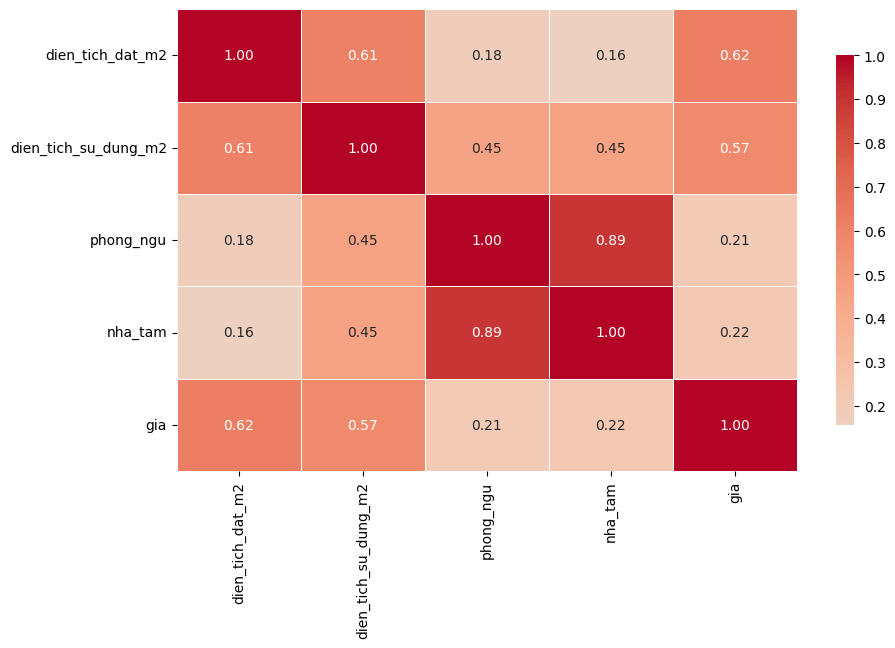

In [26]:
importance_cols = [
    'dien_tich_dat_m2',
    'dien_tich_su_dung_m2',
    'phong_ngu',
    'nha_tam',
]
heatmap_data = df_clean[importance_cols + ['gia']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.show()

+ Nhận xét: Sau khi lọc bỏ bớt outlier thì corr nhìn hợp lý hơn

# 2. Pre-processing data

+ Ở đây có 2 trường hợp:
    + Muốn sử dụng full data để train thì: 
    
        data = df_data.copy()
    
    + Muốn sử dụng data sau khi lọc thì:
    
        data = df_clean.copy()
    

+ Hiện tại đang sử dụng data clean để xem thử, nếu muốn full thì cứ thay đổi ở lệnh bên dưới.
+ Lưu ý: Đây là pipeline cho việc xem thử từng bước sẽ như nào.
+ Và data để train mô hình thì thay đổi ở phần 3

In [27]:
data = df_clean.copy()

## 2.1 Slipt data into train and test

### 2.1.1 Slipt train and test

+ Thực hiện tách dữ liệu thành 2 tập train và test (train để huấn luyện mô hình và test là đánh giá mô hình).
+ Phần này có thể tách thành 3 tập (train, val, test).

In [28]:
# Create training and validation sets
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    data, 
    test_size=0.2, 
    random_state=42)
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (3184, 6)
Test data shape: (797, 6)


### 2.2 Extract label is gia and drop in feature

+ Mục tiêu: tách giữa input(train_data, test_data) và label (y_train, y_test)

In [29]:
y_train = train_data['gia'].values
y_test = test_data['gia'].values
train_data = train_data.drop(columns=['gia'], axis=1)
test_data = test_data.drop(columns=['gia'], axis=1)


In [30]:
train_data.shape, test_data.shape

((3184, 5), (797, 5))

### 2.3 Check data having value is non-numeric or other type

+ Mục tiêu: kiểm tra các giá trị trong tập input của train và test có các giá trị nào không phải số không vì các giá trị không phải số sẽ được xử lý riêng.

In [31]:
# Lấy cột là các giá trị số
num_cols = [col for col in train_data.columns if train_data[col].dtype in ["float64","int64"]]
# Lấy cột không phải
cat_cols = [col for col in train_data.columns if train_data[col].dtype not in ["float64","int64"]]

In [32]:
len(num_cols), len(cat_cols)

(4, 1)

In [33]:
# Điều các giá trị bị thiếu trong các cột categorical là "none"
train_data[cat_cols] = train_data[cat_cols].fillna("none")
test_data[cat_cols] = test_data[cat_cols].fillna("none")

In [34]:
print("X_train shape:", train_data.shape)
print("X_test shape:", test_data.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3184, 5)
X_test shape: (797, 5)
y_train shape: (3184,)
y_test shape: (797,)


### 2.4 One-hot encoding feature "quan" (hadle data non-numberic)

+ Mục tiêu: xử lý các feature không phải số. Ở trong bài là dạng text => được xử lý bằng phương pháp one-hot encoding tức chuyển sang dạng 0,1 như bit.
+ Nếu gặp một cái mới ở test thì set one-hot là 0

#### One-hot encoding with catery in quan

In [35]:
from sklearn.preprocessing import OneHotEncoder

### One-hot encoding feature "quan"
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(train_data[cat_cols])

encoder_cols = list(encoder.get_feature_names_out(cat_cols))
train_data[encoder_cols] = encoder.transform(train_data[cat_cols])
test_data[encoder_cols] = encoder.transform(test_data[cat_cols])

#### Transform value "Nan":

+ Mục tiêu: điền các giá trị bị thiếu bằng mean ở cột data đó. Để xử lý missing data của mô hình
+ Xử lý bị thiếu cho các cột có giá trị là số còn chữ đã được xử lý ở trên là thay "nan = "none

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
train_data[num_cols] = imputer.fit_transform(train_data[num_cols])
test_data[num_cols] = imputer.transform(test_data[num_cols])

### 2.5 Information data

In [37]:
train_data

,quan,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,quan_1,quan_10,quan_11,quan_12,quan_2,...,quan_7,quan_8,quan_9,quan_Bình Thạnh,quan_Bình Tân,quan_Gò Vấp,quan_Phú Nhuận,quan_Thủ Đức (TP. Thủ Đức),quan_Tân Bình,quan_Tân Phú
586,4,70.0,70.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,8,56.0,168.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,4,60.0,120.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
462,3,78.0,350.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1861,9,30.0,30.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,6,80.0,80.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1357,7,60.0,120.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901,5,68.0,136.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3751,Thủ Đức (TP. Thủ Đức),54.0,54.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
test_data

,quan,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,quan_1,quan_10,quan_11,quan_12,quan_2,...,quan_7,quan_8,quan_9,quan_Bình Thạnh,quan_Bình Tân,quan_Gò Vấp,quan_Phú Nhuận,quan_Thủ Đức (TP. Thủ Đức),quan_Tân Bình,quan_Tân Phú
424,3,132.0,924.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3556,Tân Phú,144.0,478.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
712,4,45.0,180.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3378,Tân Bình,70.0,200.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2479,12,86.0,339.0,5.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,Bình Tân,56.0,56.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
526,4,92.0,92.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4256,9,150.0,150.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2928,Gò Vấp,60.0,238.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


+ Sau các bước pre-processing, data hiện tại đã được xử lý các giá trị bị miss, và chuyển text sang one-hot encoding (cụ thể như nào) thì xem bảng trên.

# 3. Normalization

+ Mục tiêu đưa các giá trị về [0, 1]
+ Chuẩn hoá theo min, max
+ value_new = (value_old - min)/(max - min)
+ Áp dụng với các feature trừ one-hot

## 3.1 Norm

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_num_feature = scaler.fit_transform(train_data[num_cols])
test_num_feature = scaler.transform(test_data[num_cols])

In [40]:
print("X_train shape:", train_num_feature.shape)
print("X_test shape:", test_num_feature.shape)

X_train shape: (3184, 4)
X_test shape: (797, 4)


In [41]:
train_num_feature

array([[0.06906907, 0.03451726, 0.33333333, 0.44444444],
       [0.05505506, 0.08354177, 0.33333333, 0.22222222],
       [0.05905906, 0.05952976, 0.22222222, 0.22222222],
       ...,
       [0.06706707, 0.06753377, 0.11111111, 0.11111111],
       [0.05305305, 0.02651326, 0.33333333, 0.33333333],
       [0.09409409, 0.17458729, 0.66666667, 0.44444444]])

In [42]:
test_num_feature

array([[0.13113113, 0.46173087, 0.66666667, 0.66666667],
       [0.14314314, 0.23861931, 0.44444444, 0.55555556],
       [0.04404404, 0.08954477, 0.33333333, 0.33333333],
       ...,
       [0.14914915, 0.07453727, 0.22222222, 0.22222222],
       [0.05905906, 0.11855928, 0.33333333, 0.55555556],
       [0.06406406, 0.03201601, 0.22222222, 0.22222222]])

## 3.2 Add X_train, X_test

+ Chuẩn hoá dữ liệu về dạng step by step (stack) tức lần lượt đề cho mô hình train.

+ Bỏ feature "quan" dạng text ra chỉ lấy one-hot

In [43]:
X_train = np.hstack([train_num_feature, train_data[encoder_cols].values])
X_test = np.hstack([test_num_feature, test_data[encoder_cols].values])

In [44]:
X_train.shape, X_test.shape

((3184, 23), (797, 23))

In [45]:
X_train

array([[0.06906907, 0.03451726, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.05505506, 0.08354177, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.05905906, 0.05952976, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06706707, 0.06753377, 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       [0.05305305, 0.02651326, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.09409409, 0.17458729, 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [46]:
X_test

array([[0.13113113, 0.46173087, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.14314314, 0.23861931, 0.44444444, ..., 0.        , 0.        ,
        1.        ],
       [0.04404404, 0.08954477, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14914915, 0.07453727, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.05905906, 0.11855928, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.06406406, 0.03201601, 0.22222222, ..., 0.        , 0.        ,
        0.        ]])

In [47]:
y_train

array([ 3.9  ,  0.88 ,  0.96 , ...,  1.24 ,  5.75 , 16.399])

In [48]:
y_test

array([3.60000e+01, 1.85000e+01, 4.84900e+00, 8.00000e+00, 7.69000e+00,
       7.80000e+01, 3.14900e+00, 9.90000e+01, 9.50000e+01, 9.20000e-01,
       6.50000e+00, 7.39900e+00, 1.10000e+01, 6.19900e+00, 6.90000e+00,
       1.79000e+02, 8.80000e+00, 8.15000e+00, 2.55000e+00, 2.00000e+02,
       7.00000e+00, 9.50000e+00, 5.39900e+00, 6.89900e+00, 5.80000e+00,
       2.70000e+01, 8.99000e+00, 2.95000e+00, 6.60000e+01, 5.99900e+00,
       1.95000e+01, 9.20000e+00, 3.95000e+01, 9.98000e+00, 9.40000e+00,
       3.00000e+01, 4.30000e+00, 5.30000e+00, 1.06000e+01, 5.58500e+00,
       1.09000e+01, 1.85000e+00, 2.68000e+01, 3.60000e+01, 1.70000e+01,
       8.10000e+00, 9.80000e+00, 1.08500e+00, 1.20000e+02, 1.00000e+02,
       6.20000e+00, 2.69000e+00, 1.50000e+01, 5.14900e+00, 1.25000e+01,
       2.90000e+00, 6.55000e+00, 4.30000e+01, 5.30000e+00, 4.95000e+00,
       4.10000e+00, 8.50000e+00, 1.05000e+01, 9.80000e-01, 1.60000e+01,
       1.28000e+01, 4.60000e+00, 1.39000e+01, 4.30000e+01, 2.800

# 4. Train Regression Model

+ Ridge = Linear Regression + L2 regularization

+ Lasso = Linear Regression + L1 regularization

+ Ở phần này sử dụng data đã tiền xử lý để train mô hình (để xem train như nào) còn đóng gói là phần bên dưới

## 4.1 Setup model

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Tạo danh sách model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# List storage for results
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

## 4.2 Training model

+ Hàm fit() ở đây dùng để train model bằng cách:
    +  Giải một hệ phương trình tuyến tính để tìm w tốt nhất (ít sai số bình phương nhất).
    + w_best = (X^T * X)^{-1} * X^T * y - với linear và 2 còn lại là thêm regularization.

In [50]:
# Tạo thư mục lưu mô hình
import os
folder_path_save = "Models"
if not os.path.exists(folder_path_save):
    os.makedirs(folder_path_save)


### 4.2.1 Model 1: Linear bậc 1 sử dụng full feature:

In [51]:
import joblib # Lib save model
    
def train_and_evaluate(models, X_train, y_train, X_test, y_test, folder_path_save="Models"):
    model_names = []
    train_rmse_results = []
    test_rmse_results = []
    train_r2_results = []
    test_r2_results = []

    for name, model in models.items():
        # Train model
        regression = model.fit(X_train, y_train)
        joblib.dump(regression, f"{folder_path_save}/house_price_{name}_model.joblib")

        # Predict
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # R^2 score
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Store results
        model_names.append(name)
        train_rmse_results.append(train_rmse)
        test_rmse_results.append(test_rmse)
        train_r2_results.append(train_r2)
        test_r2_results.append(test_r2)

    
    # Create results DataFrame
    results_df = pd.DataFrame({
        "Model": model_names,
        "Train RMSE": train_rmse_results,
        "Test RMSE": test_rmse_results,
        "Train R2": train_r2_results,
        "Test R2": test_r2_results
    }).sort_values(by="Test R2", ascending=False)
    return results_df



In [52]:
result = train_and_evaluate(models, X_train, y_train, X_test, y_test, folder_path_save)
result

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,LinearRegression,27.204629,28.932216,0.547532,0.600680
1,Ridge,27.213767,28.986582,0.547228,0.599178
2,Lasso,30.334053,33.844751,0.437447,0.453563


### 4.2.2 Model 2: Training Poly-nomial Regression Model (Linear bậc 2 tức là feature ^ 2) - full feature

In [53]:
train_data[num_cols]

,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam
586,70.0,70.0,4.0,5.0
1672,56.0,168.0,4.0,3.0
631,60.0,120.0,3.0,3.0
462,78.0,350.0,6.0,7.0
1861,30.0,30.0,4.0,3.0
...,...,...,...,...
1182,80.0,80.0,2.0,2.0
1357,60.0,120.0,3.0,3.0
901,68.0,136.0,2.0,2.0
3751,54.0,54.0,4.0,4.0


#### 4.2.2.1 Init model poly-monial

+ Using model degree 2

##### 4.2.2.1.1 Mũ 2 data:

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
train_poly_feat = poly_features.fit_transform(train_data[num_cols])
test_poly_feat = poly_features.transform(test_data[num_cols])

In [55]:
train_poly_feat

array([[7.00e+01, 7.00e+01, 4.00e+00, ..., 2.80e+02, 3.50e+02, 2.00e+01],
       [5.60e+01, 1.68e+02, 4.00e+00, ..., 6.72e+02, 5.04e+02, 1.20e+01],
       [6.00e+01, 1.20e+02, 3.00e+00, ..., 3.60e+02, 3.60e+02, 9.00e+00],
       ...,
       [6.80e+01, 1.36e+02, 2.00e+00, ..., 2.72e+02, 2.72e+02, 4.00e+00],
       [5.40e+01, 5.40e+01, 4.00e+00, ..., 2.16e+02, 2.16e+02, 1.60e+01],
       [9.50e+01, 3.50e+02, 7.00e+00, ..., 2.45e+03, 1.75e+03, 3.50e+01]])

In [56]:
test_poly_feat

array([[1.320e+02, 9.240e+02, 7.000e+00, ..., 6.468e+03, 6.468e+03,
        4.900e+01],
       [1.440e+02, 4.780e+02, 5.000e+00, ..., 2.390e+03, 2.868e+03,
        3.000e+01],
       [4.500e+01, 1.800e+02, 4.000e+00, ..., 7.200e+02, 7.200e+02,
        1.600e+01],
       ...,
       [1.500e+02, 1.500e+02, 3.000e+00, ..., 4.500e+02, 4.500e+02,
        9.000e+00],
       [6.000e+01, 2.380e+02, 4.000e+00, ..., 9.520e+02, 1.428e+03,
        2.400e+01],
       [6.500e+01, 6.500e+01, 3.000e+00, ..., 1.950e+02, 1.950e+02,
        9.000e+00]])

In [57]:
X_train_poly = np.hstack([train_poly_feat, train_data[encoder_cols].values])
X_test_poly = np.hstack([test_poly_feat, test_data[encoder_cols].values])

In [58]:
X_train_poly

array([[ 70.,  70.,   4., ...,   0.,   0.,   0.],
       [ 56., 168.,   4., ...,   0.,   0.,   0.],
       [ 60., 120.,   3., ...,   0.,   0.,   0.],
       ...,
       [ 68., 136.,   2., ...,   0.,   0.,   0.],
       [ 54.,  54.,   4., ...,   1.,   0.,   0.],
       [ 95., 350.,   7., ...,   0.,   0.,   1.]])

In [59]:
X_train_poly.shape, X_test_poly.shape

((3184, 29), (797, 29))

In [60]:
y_train.shape, y_test.shape

((3184,), (797,))

##### 4.2.2.1.2 Khởi tạo mô hình (giống trên) và train:

In [61]:
# making dictionary of models
models = {
    "LinearRegression_poly": LinearRegression(),
    "Ridge_poly": Ridge(),
    "Lasso_poly": Lasso()
}
result_poly = train_and_evaluate(models, X_train_poly, y_train, X_test_poly, y_test, folder_path_save)
result_final = pd.concat([result, result_poly], axis=0).sort_values(by="Test R2", ascending=False)

In [62]:
result_final

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,LinearRegression_poly,26.750900,28.395073,0.562499,0.615370
1,Ridge_poly,26.751120,28.416087,0.562492,0.614800
0,LinearRegression,27.204629,28.932216,0.547532,0.600680
1,Ridge,27.213767,28.986582,0.547228,0.599178
2,Lasso_poly,28.342584,31.425256,0.508887,0.528898
2,Lasso,30.334053,33.844751,0.437447,0.453563


### Nhận xét:

+ Về mặt metric tốt nhất: LinearRegression_poly

+ Về mặt ổn định/regularization: Ridge_poly cũng là lựa chọn rất hợp lý (gần như ngang nhau).
+ Nhóm sử dụng các chỉ số RMSE và R² trên tập validation/test để chọn mô hình.
Trong các mô hình so sánh, LinearRegression_poly cho Test RMSE thấp nhất (~28.40) và Test R² cao nhất (~0.615), do đó được chọn là mô hình tốt nhất cho bài toán này.

+ Mô hình Ridge_poly cho kết quả rất gần tương đương, có thể được cân nhắc khi ưu tiên tính ổn định do có regularization L2.

# 5. Full pipeline from normalization to predict (weight cho app):

+ Ở phần này sẽ đọc lập với các phần trên. Vì phần này sẽ đóng gói các bước pre-processing, norm lại để lưu.
+ Mục tiêu: lưu weight và các bước từ xử lý đến norm, đế weight để tránh việc train bằng các norm, pre-processing và infer khác biệt.
+ Phần này đang sử dụng data là full data.

## Hướng dẫn nếu muốn train ít feature hơn:

+ Hiện tại nếu muốn train với ít feature hơn:
    + Step 1: Thay đổi data_model (drop các feature không liên quan ra) - ở phần 0.
    + Step 2: Ở phần 5.3 thay đổi các trường mik mong muốn lấy:
        + num_cols
        + cat_cols
    + Step 3: Thay đổi pre-processing - bỏ dữ liệu số thì không làm gì, bỏ text thì thực hiện:
        + Với mô hình bậc 1: thay đổi ở 5.3 bỏ đi phần one-hot cho text categorical_transformer (comment lại).
        + Với mô hình bậc 2: thay đổi 5.4.2.
    + Step 4: Chạy mô hình bình thường.

## 0. Information data:

In [63]:
data_model = data.copy()

In [64]:
data_model

,quan,dien_tich_dat_m2,dien_tich_su_dung_m2,phong_ngu,nha_tam,gia
2,10,53.0,53.0,2.0,2.0,4.3
4,10,102.0,102.0,2.0,2.0,3.7
5,10,79.0,79.0,2.0,2.0,4.9
6,10,72.0,72.0,2.0,2.0,5.5
7,10,103.0,103.0,3.0,2.0,8.2
...,...,...,...,...,...,...
4257,9,137.0,113.0,1.0,1.0,12.0
4258,9,56.0,57.0,2.0,1.0,5.5
4259,9,64.0,64.0,3.0,1.0,11.0
4260,9,100.0,200.0,4.0,3.0,16.0


## 5.1 Slipt data

In [65]:
# Create training and validation sets
from sklearn.model_selection import train_test_split

train_data_new, test_data_new = train_test_split(
    data_model, 
    test_size=0.2, 
    random_state=42)
print("Train data shape:", train_data_new.shape)
print("Test data shape:", test_data_new.shape)

Train data shape: (3184, 6)
Test data shape: (797, 6)


In [66]:
y_train_new = train_data_new['gia'].values
y_test_new = test_data_new['gia'].values
train_data_new = train_data_new.drop(columns=['gia'], axis=1)
test_data_new = test_data_new.drop(columns=['gia'], axis=1)


In [67]:
print("X_train shape:", train_data_new.shape)
print("X_test shape:", test_data_new.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3184, 5)
X_test shape: (797, 5)
y_train shape: (3184,)
y_test shape: (797,)


## 5.2 Setup model

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Tạo danh sách model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}
names_list = {
    "LinearRegression": "LinearRegression",
    "Ridge": "Ridge",
    "Lasso": "Lasso",
    "Linear_poly": "LinearRegression",
    "Ridge_poly": "Ridge",
    "Lasso_poly": "Lasso"

}
# List storage for results
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

## 5.3 Phân tách các feature số và text (chuyên biệt cho bậc 1):

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

num_cols = ["dien_tich_dat_m2", "dien_tich_su_dung_m2", "phong_ngu", "nha_tam"]
cat_cols = ["quan"]

# Step 1: Preprocessing for numerical data
numeric_transformer_1 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

# Step 2: Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Step 3: Combine preprocessing steps
preprocess_1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_1, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

## 5.4 Train model

###  5.4.1 Model 1: Model linear (bậc 1):

In [70]:
import joblib # Lib save model

def train_and_evaluate_degree_1(models, X_train_new, y_train_new, X_test_new, y_test_new, folder_path_save="Models", names_list=[], preprocess=None):
    model_names = []
    train_rmse_results = []
    test_rmse_results = []
    train_r2_results = []
    test_r2_results = []


    for name in names_list.keys():
        # Train model
        regression = Pipeline(steps=[
            ("preprocess", preprocess),
            ("regressor", models[names_list[name]])
        ])
        regression = regression.fit(X_train_new, y_train_new)
        joblib.dump(regression, f"{folder_path_save}/house_price_{name}_model.joblib")

        # Predict
        y_train_pred = regression.predict(X_train_new)
        y_test_pred = regression.predict(X_test_new)
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train_new, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test_new, y_test_pred))

        # R^2 score
        train_r2 = r2_score(y_train_new, y_train_pred)
        test_r2 = r2_score(y_test_new, y_test_pred)
        # Store results
        model_names.append(name)
        train_rmse_results.append(train_rmse)
        test_rmse_results.append(test_rmse)
        train_r2_results.append(train_r2)
        test_r2_results.append(test_r2)

    
    # Create results DataFrame
    results_df = pd.DataFrame({
        "Model": model_names,
        "Train RMSE": train_rmse_results,
        "Test RMSE": test_rmse_results,
        "Train R2": train_r2_results,
        "Test R2": test_r2_results
    }).sort_values(by="Test R2", ascending=False)
    return results_df

In [71]:
names_list_1 = {
    "LinearRegression": "LinearRegression",
    "Ridge": "Ridge",
    "Lasso": "Lasso",
}
result_1 = train_and_evaluate_degree_1(models, train_data_new, y_train_new, test_data_new, y_test_new, folder_path_save, names_list_1, preprocess_1)
result_1

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,LinearRegression,27.204629,28.932217,0.547532,0.600680
1,Ridge,27.213767,28.986629,0.547228,0.599177
2,Lasso,30.334053,33.844751,0.437447,0.453563


### 5.4.2 Model 2: Model poly (Mô hình bậc 2):

#### Xử lý pre-processing lại (thêm mũ 2 vào giá trị data):

In [72]:
numeric_transformer_2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("poly", PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ("scaler", MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_2 = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, cat_cols),
        ("num", numeric_transformer_2, num_cols),
    ]
)

#### Train mô hình:

In [73]:
import joblib # Lib save model

def train_and_evaluate_poly(models, X_train_new, y_train_new, X_test_new, y_test_new, folder_path_save="Models", names_list=None, preprocess=None):
    model_names = []
    train_rmse_results = []
    test_rmse_results = []
    train_r2_results = []
    test_r2_results = []


    for name in names_list.keys():
        # Train model
        regression = Pipeline(steps=[
            ("preprocess", preprocess),
            ("regressor", models[names_list[name]])
        ])
        regression = regression.fit(X_train_new, y_train_new)
        joblib.dump(regression, f"{folder_path_save}/house_price_{name}_model.joblib")

        # Predict
        y_train_pred = regression.predict(X_train_new)
        y_test_pred = regression.predict(X_test_new)
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train_new, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test_new, y_test_pred))

        # R^2 score
        train_r2 = r2_score(y_train_new, y_train_pred)
        test_r2 = r2_score(y_test_new, y_test_pred)
        # Store results
        model_names.append(name)
        train_rmse_results.append(train_rmse)
        test_rmse_results.append(test_rmse)
        train_r2_results.append(train_r2)
        test_r2_results.append(test_r2)

    
    # Create results DataFrame
    results_df = pd.DataFrame({
        "Model": model_names,
        "Train RMSE": train_rmse_results,
        "Test RMSE": test_rmse_results,
        "Train R2": train_r2_results,
        "Test R2": test_r2_results
    }).sort_values(by="Test R2", ascending=False)
    return results_df

In [74]:
names_list_poly = {
    "Linear_poly": "LinearRegression",
    "Ridge_poly": "Ridge",
    "Lasso_poly": "Lasso",
}
result_poly = train_and_evaluate_poly(models, train_data_new, y_train_new, test_data_new, y_test_new, folder_path_save, names_list_poly, preprocess_2)
result_poly

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear_poly,26.750900,28.395073,0.562499,0.615370
1,Ridge_poly,26.957596,28.882571,0.555712,0.602049
2,Lasso_poly,30.334053,33.844753,0.437447,0.453563


## Final Result

In [75]:
result_final

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,LinearRegression_poly,26.750900,28.395073,0.562499,0.615370
1,Ridge_poly,26.751120,28.416087,0.562492,0.614800
0,LinearRegression,27.204629,28.932216,0.547532,0.600680
1,Ridge,27.213767,28.986582,0.547228,0.599178
2,Lasso_poly,28.342584,31.425256,0.508887,0.528898
2,Lasso,30.334053,33.844751,0.437447,0.453563


In [76]:
final_result_2 = pd.concat([result_1, result_poly], axis=0).sort_values(by="Test R2", ascending=False)
final_result_2

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear_poly,26.750900,28.395073,0.562499,0.615370
1,Ridge_poly,26.957596,28.882571,0.555712,0.602049
0,LinearRegression,27.204629,28.932217,0.547532,0.600680
1,Ridge,27.213767,28.986629,0.547228,0.599177
2,Lasso,30.334053,33.844751,0.437447,0.453563
2,Lasso_poly,30.334053,33.844753,0.437447,0.453563


# Test thử mô hình được sử dụng cho web:

In [77]:
# 1. Load lại model y chang app.py
model = joblib.load("Models/house_price_Linear_poly_model.joblib")

# 2. Tạo đúng input như web
input_df = pd.DataFrame({
    "quan": ["1"],
    "dien_tich_dat_m2": [40],
    "dien_tich_su_dung_m2": [200],
    "phong_ngu": [10],
    "nha_tam": [11],
})

y_pred = model.predict(input_df)
print(y_pred)

[40.71850834]
